## Найти собственные значения и собственные функции для прямоугольной потенциальной ямы

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

## Константы

In [53]:
PLANCK = 1.0545718e-34  # Постоянная Планка 
E_V = 1.60218e-19      # Электрон-вольт 
M_E = 9.10938356e-31  # Масса электрона 

## Определение класса SchrodingerSolver

In [54]:
class SchrodingerSolver:
    def __init__(self, width, depth, grid, total_length):
        self.width = width # Ширина потенциальной ямы 
        self.depth = depth * E_V # Глубина потенциальной ямы
        self.grid = grid # Количество точек сетки
        self.total_length = total_length # Длина расчетной области

        # Cетка и потенциал
        self.x, self.dx = self._initialize_grid()
        self.potential = self._initialize_potential()

        # Гамильтониан
        self.hamiltonian = self._construct_hamiltonian()

    def _initialize_potential(self):
        # Функция потенциальной энергии V(x)
        potential = np.zeros_like(self.x) 
        for i, pos in enumerate(self.x):
            if abs(pos) < self.width / 2:  # внутри ямы
                potential[i] = -self.depth 
            else:
                potential[i] = 0  # вне ямы
        return potential

    def _initialize_grid(self):
        x = np.linspace(-self.total_length / 2, self.total_length / 2, self.grid)
        return x, x[1] - x[0]  

    def _construct_hamiltonian(self):
        diagonal_const = PLANCK**2 / (2 * M_E * self.dx**2)  
        hamiltonian = np.zeros((self.grid, self.grid))

        for i in range(self.grid):
            hamiltonian[i, i] = 2 * diagonal_const + self.potential[i]
            if i + 1 < self.grid:
                hamiltonian[i, i + 1] = -diagonal_const 
            if 0 < i:
                hamiltonian[i, i - 1] = -diagonal_const  
        
        return hamiltonian

    def solve(self):
        # Поиск собственных значений
        eigenvalues, eigenvectors = eigh(self.hamiltonian)  
        return eigenvalues / E_V, eigenvectors / np.sqrt(self.dx)  

    def get_bound_states(self, eigenvalues, eigenvectors):
        # Связанные состояния
        bound_states_mask = eigenvalues < 0  
        bound_energies = eigenvalues[bound_states_mask]  
        bound_wavefunctions = eigenvectors[:, bound_states_mask]  
        return bound_energies, bound_wavefunctions

    def plot_results(self, bound_energies, bound_wavefunctions):
        plt.figure(figsize=(15, 8))
        colors = ['blue', 'green', 'orange', 'red', 'purple'] 
        for i, energy in enumerate(bound_energies):
            plt.plot(
                self.x * 1e9, 
                bound_wavefunctions[:, i] / np.max(np.abs(bound_wavefunctions[:, i])) * 0.5 + energy, 
                label=f"E[{i+1}]={energy:.2f} eV", color=colors[i % len(colors)]
            )

        plt.plot(self.x * 1e9, self.potential / E_V, 'k--', label='Потенциал V(x)')

        plt.title("Собственные функции и уровни энергии в прямоугольной потенциальной яме")
        plt.xlabel("x (нм)")  
        plt.ylabel("Энергия (эВ)")  
        plt.ylim(-self.depth / E_V - 1, 1)  
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
        plt.legend()
        plt.grid()
        plt.show()


## Пример работы

In [55]:
width = 1e-9  
depth = 4
grid = 800 
total_length = 3 * width

solver = SchrodingerSolver(width, depth, grid, total_length)
energies, wavefunctions = solver.solve()

bound_energies, bound_wavefunctions = solver.get_bound_states(energies, wavefunctions)
print("Связанные уровни энергии (эВ):", bound_energies)

Связанные уровни энергии (эВ): [-3.73719889 -2.96171906 -1.72594015 -0.23851044]


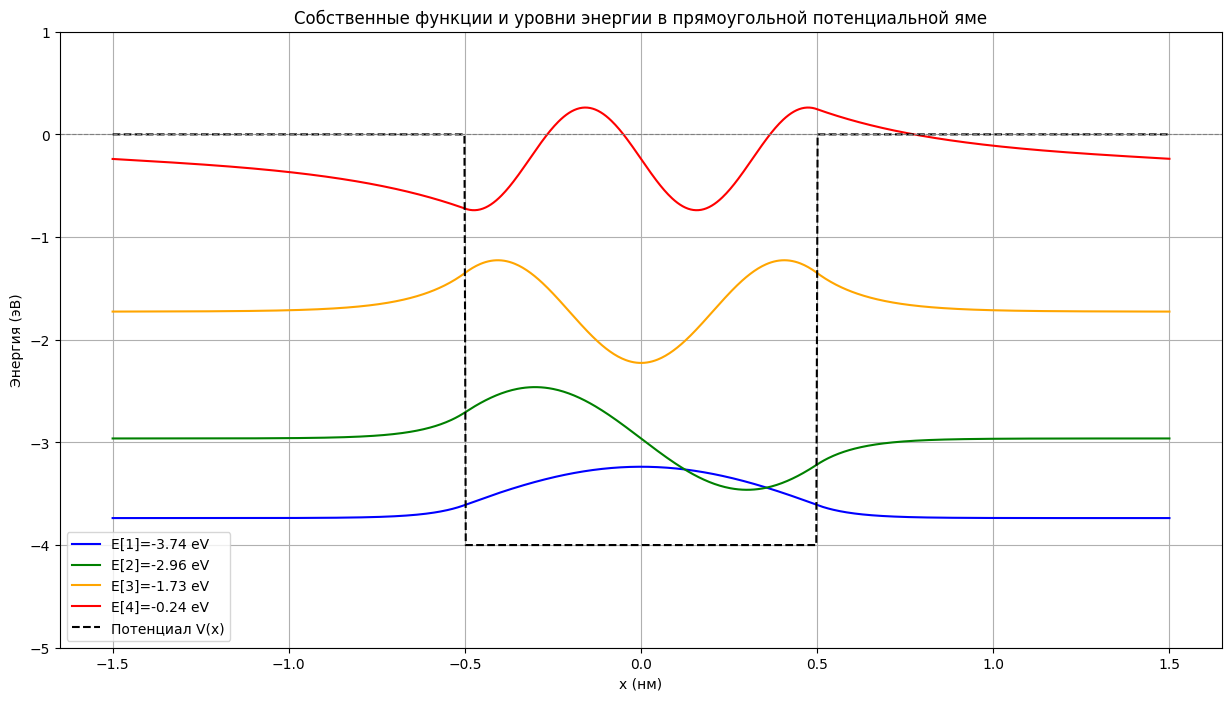

In [56]:
solver.plot_results(bound_energies, bound_wavefunctions)